In [318]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy import stats
import plotly
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

In [319]:
df2=pd.read_csv("Wholesale customers data.csv")
df2.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [320]:
#removing irrelevant columns from the dataset
df1=df2.drop(['Channel','Region'],axis=1)
df1.shape

(440, 6)

In [321]:
df1.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


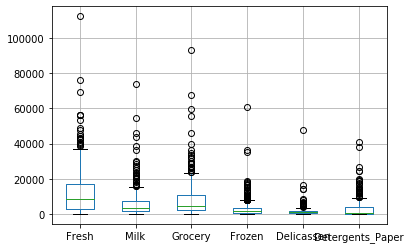

In [322]:
boxplot = df1.boxplot(column=["Fresh","Milk","Grocery","Frozen","Delicassen","Detergents_Paper"])#examining the outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB5B45D788>,
      dtype=object)

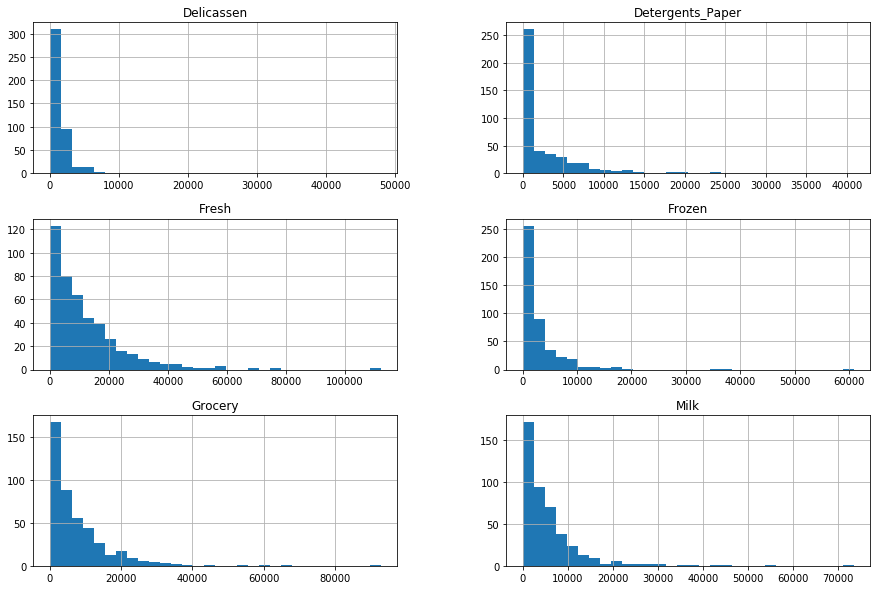

In [323]:
df1.hist(bins=30, figsize=(15, 10)) 
#the variables look skewed to the right

In [324]:
df = np.log(df1) # using log transformation to normalize the data 
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [325]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] #using IQR method to get rid of outliers
print(df_out.shape)

(440, 6)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB5BB19248>,
      dtype=object)

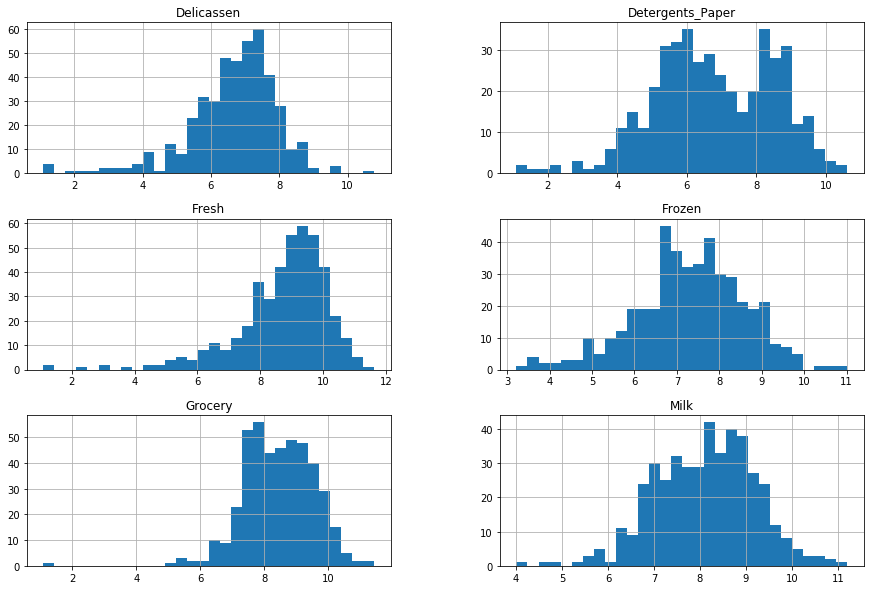

In [326]:
df_out.hist(bins=30, figsize=(15, 10))

In [327]:
range_n_clusters = [2, 3, 4, 5, 6]

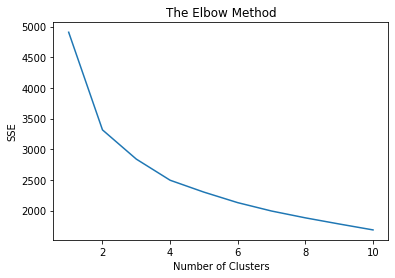

In [341]:
sse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(df_out)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [344]:
 # Loop through clusters
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters).fit(df_out)

    # Predict the cluster for each data point
    preds = clusterer.predict(df_out)

    # Find the cluster centers
    centers = clusterer.cluster_centers_

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(df_out, preds, metric='euclidean')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters,score))

For n_clusters = 2. The average silhouette_score is : 0.31641882452439524
For n_clusters = 3. The average silhouette_score is : 0.27435362899538474
For n_clusters = 4. The average silhouette_score is : 0.1994485491973471
For n_clusters = 5. The average silhouette_score is : 0.20488930629555963
For n_clusters = 6. The average silhouette_score is : 0.20423560697468224


In [337]:
import plotly.graph_objects as go
import plotly.express as px
kmeans = KMeans(
        n_clusters=2, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(df_out)
clusters=pd.DataFrame(df_out)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig.show()

In [338]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red'])
